In [74]:
import rasterio 

def get_altitude(dem_file_path, longitude, latitude): 
    with rasterio.open(dem_file_path) as src: 
        row, col = rasterio.transform.rowcol(src.transform, longitude, latitude)
        band = src.read(1) 
        hgt = band[row,col] 
    return hgt


In [75]:
#import libraries
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import math

In [76]:
# Process 1

!wget https://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_65_04.zip
!unzip srtm_65_04.zip
!rm srtm_65_04.zip

--2023-08-17 14:22:15--  https://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_65_04.zip
srtm.csi.cgiar.org (srtm.csi.cgiar.org) をDNSに問いあわせています... 45.5.184.25
srtm.csi.cgiar.org (srtm.csi.cgiar.org)|45.5.184.25|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 17365907 (17M) [application/zip]
`srtm_65_04.zip.1' に保存中

srtm_65_04.zip.1    100%[===================>]  16.56M  3.33MB/s 時間 5.2s       

2023-08-17 14:22:21 (3.19 MB/s) - `srtm_65_04.zip.1' へ保存完了 [17365907/17365907]

--2023-08-17 14:22:21--  http://./
. (.) をDNSに問いあわせています... 失敗しました: nodename nor servname provided, or not known.
wget: ホストアドレス `.' を解決できませんでした。
終了しました --2023-08-17 14:22:21--
経過時間: 6.4s
ダウンロード完了: 1 ファイル、17M バイトを 5.2s で取得 (3.19 MB/s)
Archive:  srtm_65_04.zip
replace readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


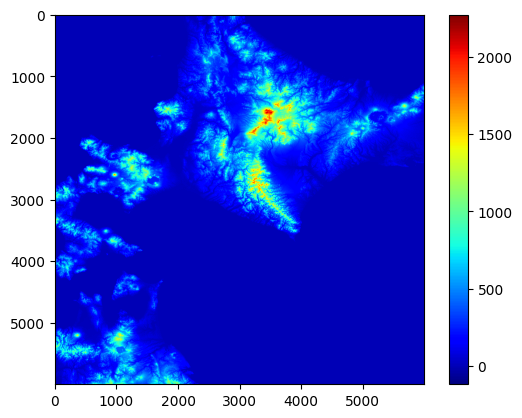

In [77]:
# Process 2,3
file_name = "srtm_65_04.tif"
with rasterio.open(file_name) as src:
    band = src.read(1)
    # change to numpy
    band_np = np.array(band)
    # clip seelevel value -32768 -> 0
    band_np[band_np == -32768] = 0 
    # plot with colormap
    plt.figure()
    plt.imshow(band_np, cmap='jet')
    plt.colorbar()
    plt.show()


In [92]:
# Process 4
# Start point: (row, col) = (3600, 1200) 
# End point: (row, col) = (1200, 4800) 

start_point=np.array([3600, 1200])
end_point=np.array([1200, 4800])

# sampling step for now
step = 100
xsteps = np.linspace(start_point[1], end_point[1], step)
ysteps = np.linspace(start_point[0], end_point[0], step)

def get_value_with_floor(data: np.array, x: float, y: float) -> float:
    return data[math.floor(y), math.floor[x]]


def get_value_with_bilinear_interpolation(data: np.array, x: float, y: float) -> float:
    x_0 = math.floor(x) 
    y_0 = math.floor(y)
    x_1 = x_0 + 1
    y_1 = y_0 + 1
    # clip border
    x_1 = min(data.shape[1]-1, x_1)
    y_1 = min(data.shape[0]-1, y_1)
    m = x - x_0
    n = y - y_0
    # x interpolation (x_1 - j_0 = 1)
    x_int_y0 = m * data[y_0, x_0] + (1-m) * data[y_0, x_1]
    x_int_y1 = m * data[y_1, x_0] + (1-m) * data[y_1, y_1]
    # y interpolation
    return n * x_int_y0 + (1-n) * x_int_y1

profile = []
for x, y in zip(xsteps, ysteps):
    elevation = get_value_with_bilinear_interpolation(band_np, x, y)
    profile.append(elevation)

AttributeError: 'Axes' object has no attribute 'show'

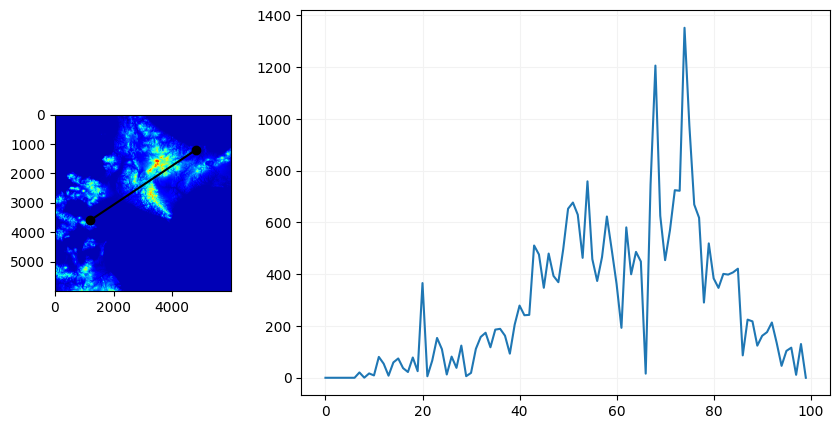

In [104]:
plt1 = plt.figure(figsize=(10,5))
plt1.tight_layout()
ax = plt1.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3]})
ax[0].imshow(band_np, cmap='jet')
ax[0].plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], color="black", marker="o")
ax[1].plot(profile)
ax[1].grid(axis='x', color='0.95')
ax[1].grid(axis='y', color='0.95')
plt1.show()